In [1]:
import numpy as np
import pandas as pd
import timeit
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

def avg_time(stmt, num_iterations=10):
    t = timeit.timeit(stmt=stmt, globals=globals(), number=num_iterations)
    return t / num_iterations

In [2]:
file_name = r'/home/kali/Desktop/lab/household_power_consumption.txt'
with open(file_name, 'r', encoding='utf-8') as file:
    first_line = file.readline()
headers = first_line.rstrip('\n').split(";")
print("Заголовки:", headers)

Заголовки: ['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


In [3]:
def readfile(file, header):
    df_fun = pd.read_csv(file, sep=";", header=0, names=header, na_values=['?'])
    return df_fun.dropna()

list_time_pd = []
time_pd = avg_time('readfile(file_name, headers)')
list_time_pd.append(time_pd)
print(f"Час зчитування з використанням pandas: {time_pd:.6f} секунд")

df_pd = readfile(file_name, headers)

Час зчитування з використанням pandas: 1.339839 секунд


In [4]:
dtype_np = [
    ("Date", "U10"), ("Time", "U8"),
    ("Global_active_power", "float64"),
    ("Global_reactive_power", "float64"),
    ("Voltage", "float64"),
    ("Global_intensity", "float64"),
    ("Sub_metering_1", "float64"),
    ("Sub_metering_2", "float64"),
    ("Sub_metering_3", "float64")
]

def readfile_np(file, dtype):
    data = np.genfromtxt(file, delimiter=';', dtype=dtype, encoding="UTF-8", names=True, 
                           missing_values=["?"], filling_values=np.nan)
    return data[~np.isnan(data["Global_active_power"])]

list_time_np = []
time_np = avg_time('readfile_np(file_name, dtype_np)')
list_time_np.append(time_np)
print(f"Час зчитування з використанням numpy: {time_np:.6f} секунд")

data_np = readfile_np(file_name, dtype_np)

Час зчитування з використанням numpy: 7.642136 секунд


In [5]:
def task1_pd(df):
    return df[df['Global_active_power'] > 5]

time_filter1_pd = avg_time('task1_pd(df_pd)')
list_time_pd.append(time_filter1_pd)
print(f"Час вибірки 1 з використанням pandas: {time_filter1_pd:.6f} секунд")

df_task1 = task1_pd(df_pd)

def task1_np(data):
    mask = data['Global_active_power'] > 5
    return data[mask]

time_filter1_np = avg_time('task1_np(data_np)')
list_time_np.append(time_filter1_np)
print(f"Час вибірки 1 з використанням numpy: {time_filter1_np:.6f} секунд")

data_task1 = task1_np(data_np)

Час вибірки 1 з використанням pandas: 0.004673 секунд
Час вибірки 1 з використанням numpy: 0.013449 секунд


In [6]:
def task2_pd(df):
    return df[df['Voltage'] > 235]

time_filter2_pd = avg_time('task2_pd(df_pd)')
list_time_pd.append(time_filter2_pd)
print(f"Час вибірки 2 з використанням pandas: {time_filter2_pd:.6f} секунд")

df_task2 = task2_pd(df_pd)

def task2_np(data):
    mask = data['Voltage'] > 235
    return data[mask]

time_filter2_np = avg_time('task2_np(data_np)')
list_time_np.append(time_filter2_np)
print(f"Час вибірки 2 з використанням numpy: {time_filter2_np:.6f} секунд")

data_task2 = task2_np(data_np)

Час вибірки 2 з використанням pandas: 0.073406 секунд
Час вибірки 2 з використанням numpy: 0.093587 секунд


In [7]:
def task3_pd(df):
    cond_intensity = df['Global_intensity'].between(19, 20)
    cond_appliances = (df['Sub_metering_1'] + df['Sub_metering_2']) > df['Sub_metering_3']
    return df[cond_intensity & cond_appliances]

time_filter3_pd = avg_time('task3_pd(df_pd)')
list_time_pd.append(time_filter3_pd)
print(f"Час вибірки 3 з використанням pandas: {time_filter3_pd:.6f} секунд")

df_task3 = task3_pd(df_pd)

def task3_np(data):
    intensity = (data['Global_intensity'] >= 19) & (data['Global_intensity'] <= 20)
    appliances = (data['Sub_metering_1'] + data['Sub_metering_2']) > data['Sub_metering_3']
    mask = intensity & appliances
    return data[mask]

time_filter3_np = avg_time('task3_np(data_np)')
list_time_np.append(time_filter3_np)
print(f"Час вибірки 3 з використанням numpy: {time_filter3_np:.6f} секунд")

data_task3 = task3_np(data_np)

Час вибірки 3 з використанням pandas: 0.011066 секунд
Час вибірки 3 з використанням numpy: 0.050993 секунд


In [8]:
def task4_pd(df):
    sample_df = df.sample(n=500000, replace=False).sort_index()
    means = sample_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return sample_df, means

time_task4_pd = avg_time('task4_pd(df_pd)')
list_time_pd.append(time_task4_pd)
print(f"Час вибірки 4 з використанням pandas: {time_task4_pd:.6f} секунд")

df_sample, means_pd = task4_pd(df_pd)
print("Середні значення (pandas):\n", means_pd)

def task4_np(data):
    num_rows = data.shape[0]
    indices = np.random.choice(num_rows, size=500000, replace=False)
    sample_np = data[indices]
    mean_sm1 = np.mean(sample_np['Sub_metering_1'])
    mean_sm2 = np.mean(sample_np['Sub_metering_2'])
    mean_sm3 = np.mean(sample_np['Sub_metering_3'])
    means = {'Sub_metering_1': mean_sm1, 'Sub_metering_2': mean_sm2, 'Sub_metering_3': mean_sm3}
    return sample_np, means

time_task4_np = avg_time('task4_np(data_np)')
list_time_np.append(time_task4_np)
print(f"Час вибірки 4 з використанням numpy: {time_task4_np:.6f} секунд")

data_sample_np, means_np = task4_np(data_np)
print("Середні значення (numpy):\n", means_np)

Час вибірки 4 з використанням pandas: 0.255834 секунд
Середні значення (pandas):
 Sub_metering_1    1.136138
Sub_metering_2    1.285700
Sub_metering_3    6.458050
dtype: float64
Час вибірки 4 з використанням numpy: 0.187832 секунд
Середні значення (numpy):
 {'Sub_metering_1': 1.129116, 'Sub_metering_2': 1.296996, 'Sub_metering_3': 6.468412}


In [9]:
def task5_pd(df):
    df['Time_dt'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    cond_time = df['Time_dt'].dt.time > datetime.strptime("18:00:00", "%H:%M:%S").time()
    cond_power = df['Global_active_power'] > 6
    df_filtered = df[cond_time & cond_power].copy()
    df_group2 = df_filtered[(df_filtered['Sub_metering_2'] > df_filtered['Sub_metering_1']) & 
                           (df_filtered['Sub_metering_2'] > df_filtered['Sub_metering_3'])]
    n = len(df_group2)
    first_half = df_group2.iloc[:n//2]
    second_half = df_group2.iloc[n//2:]
    selected_first = first_half.iloc[::3]
    selected_second = second_half.iloc[::4]
    final_df = pd.concat([selected_first, selected_second])
    return final_df

time_task5_pd = avg_time('task5_pd(df_pd)')
list_time_pd.append(time_task5_pd)
print(f"Час вибірки 5 з використанням pandas: {time_task5_pd:.6f} секунд")

df_task5 = task5_pd(df_pd)

def task5_np(data):
    time_data = np.array([datetime.strptime(t, "%H:%M:%S") for t in data['Time']])
    time_threshold = datetime.strptime("18:00:00", "%H:%M:%S")
    mask_time = time_data > time_threshold
    mask_power = data['Global_active_power'] > 6
    data_filtered = data[mask_time & mask_power]
    mask_group2 = (data_filtered['Sub_metering_2'] > data_filtered['Sub_metering_1']) & (data_filtered['Sub_metering_2'] > data_filtered['Sub_metering_3'])
    data_group2 = data_filtered[mask_group2]
    n = data_group2.shape[0]
    first_half_np, second_half_np = np.array_split(data_group2, 2)
    selected_first_np = first_half_np[::3]
    selected_second_np = second_half_np[::4]
    final_data = np.concatenate((selected_first_np, selected_second_np))
    return final_data


time_task5_np = avg_time('task5_np(data_np)')
list_time_np.append(time_task5_np)
print(f"Час вибірки 5 з використанням numpy: {time_task5_np:.6f} секунд")

data_task5 = task5_np(data_np)

Час вибірки 5 з використанням pandas: 3.833085 секунд
Час вибірки 5 з використанням numpy: 10.003987 секунд


/home/kali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

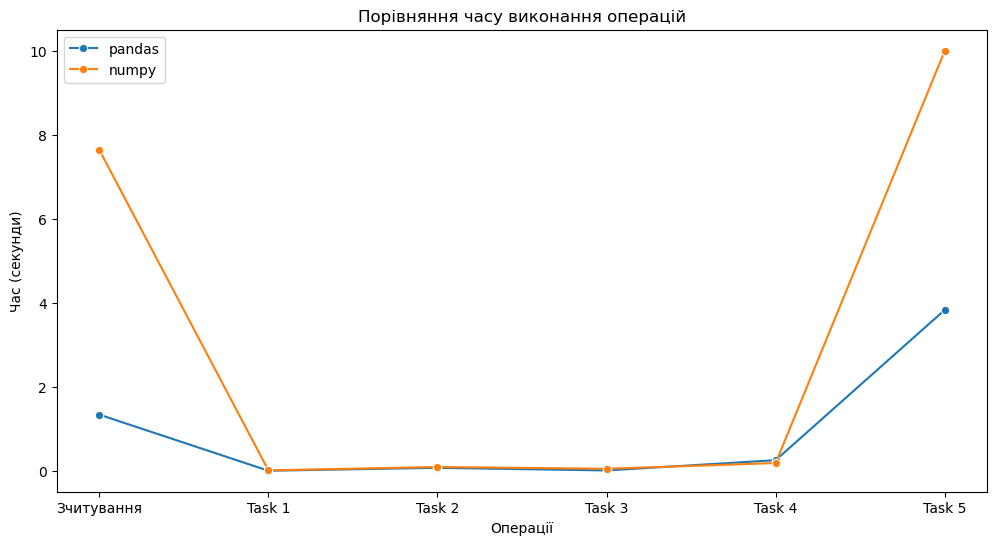

In [10]:
operations = ['Зчитування', 'Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5']
plt.figure(figsize=(12,6))
sns.lineplot(x=operations, y=list_time_pd[:len(operations)], marker='o', label='pandas')
sns.lineplot(x=operations, y=list_time_np[:len(operations)], marker='o', label='numpy')
plt.xlabel('Операції')
plt.ylabel('Час (секунди)')
plt.title('Порівняння часу виконання операцій')
plt.legend()
plt.show()

Pandas: 5/5. Завдяки вбудованим методам для фільтрації, зчитування та обробки даних (особливо дат та часу), Pandas робить код читабельним і простим у використанні.

NumPy: 3/5. Для чистих масивних операцій NumPy чудово підходить, але при відборі за кількома умовами та роботі з часом потрібно більше ручних кроків, що ускладнює код і може сповільнити виконання.